In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix

In [2]:
movies_df = pd.read_pickle('movie-data.pkl')

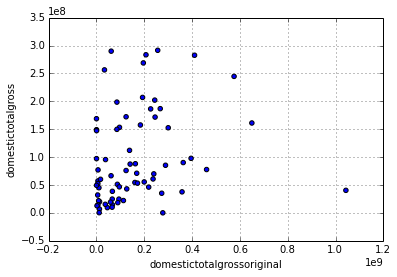

In [3]:
%matplotlib inline

movies_df.plot(x='domestictotalgrossoriginal', y='domestictotalgross', kind ='scatter')

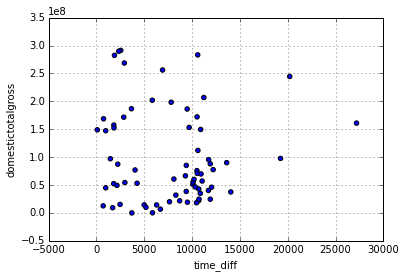

In [6]:
movies_df.plot(x='time_diff', y='domestictotalgross', kind ='scatter')

In [10]:
log_gross = (movies_df['domestictotalgross'].apply(np.log)).tolist()
original_gross = movies_df['domestictotalgrossoriginal'].tolist()
time_diff = movies_df['time_diff'].tolist()

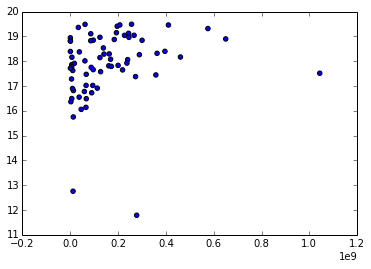

In [12]:
plt.scatter(original_gross, log_gross)

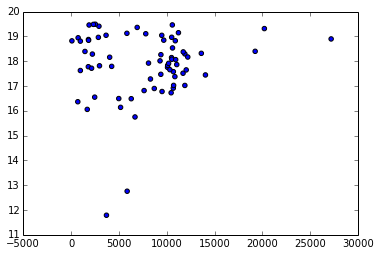

In [14]:
plt.scatter(time_diff, log_gross)

In [18]:
y, X = dmatrices('domestictotalgross ~ domestictotalgrossoriginal', data=movies_df, return_type='dataframe')

In [70]:
model1 = sm.OLS(y, X)
results1 = model1.fit()
res = results1.resid
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.011
Date:                Tue, 06 Oct 2015   Prob (F-statistic):             0.0492
Time:                        14:49:02   Log-Likelihood:                -1372.6
No. Observations:                  70   AIC:                             2749.
Df Residuals:                      68   BIC:                             2754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   7.937e+07   1.29e+07      6.132      0.000      5.35e+07  1.05e+08
domestictotalgrossoriginal     0.1094      0.055      2.003      0.049         0.000     0.218
==============================================================================
Omnibus:                        8.583   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.009
Skew:                           0.878   Prob(JB):                       0.0111
Kurtosis:                       2.957   Cond. No.                     3.19e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

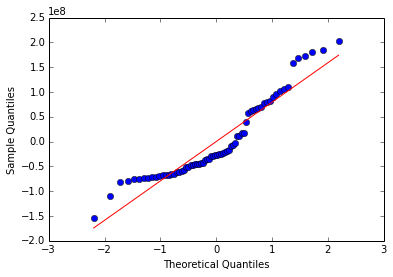

In [22]:
fig = sm.qqplot(res, line='s')
plt.show()

In [23]:
y2, X2 = dmatrices('np.log(domestictotalgross) ~ domestictotalgrossoriginal', data=movies_df, return_type='dataframe')

In [24]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
res2 = results2.resid

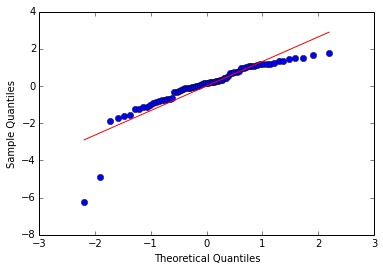

In [26]:
fig2 = sm.qqplot(res2, line='s')
plt.show()

In [39]:
movies_df.columns

Index([u'title', u'originaltitle', u'domestictotalgross', u'domestictotalgrossoriginal', u'releasedate', u'releasedateoriginal', u'genreremake', u'genreoriginal', u'ratingremake', u'ratingoriginal', u'time_diff', u'SameRating', u'comedy', u'action', u'adventure', u'horror', u'romance', u'music', u'fantasy', u'drama', u'thriller', u'scifi'], dtype='object')

In [43]:
y3, X3 = dmatrices('domestictotalgross ~ domestictotalgrossoriginal + time_diff+'\
                   'adventure + fantasy + scifi', data=movies_df, return_type='dataframe')

In [44]:
model3 = sm.OLS(y3, X3)
results3 = model3.fit_regularized()
res3 = results3.resid

In [45]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     8.382
Date:                Tue, 06 Oct 2015   Prob (F-statistic):           3.84e-06
Time:                        13:23:05   Log-Likelihood:                -1357.0
No. Observations:                  70   AIC:                             2726.
Df Residuals:                      64   BIC:                             2739.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   7.329e+07   1.59e+07      4.610      0.000      4.15e+07  1.05e+08
adventure[T.True]           9.908e+07   2.18e+07      4.546      0.000      5.55e+07  1.43e+08
fantasy[T.True]             1.306e+08   4.06e+07      3.214      0.002      4.94e+07  2.12e+08
scifi[T.True]               6.709e+07   2.85e+07      2.353      0.022      1.01e+07  1.24e+08
domestictotalgrossoriginal     0.0510      0.056      0.910      0.366        -0.061     0.163
time_diff                  -2027.9654   1905.782     -1.064      0.291     -5835.203  1779.273
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.082
Skew:                          -0.066   Prob(JB):                        0.960
Kurtosis:                       3.103   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  -12.4. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
movies_df['fantasy'].value_counts()

False    67
True      3
dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.1, random_state=42)
model3 = sm.OLS(y_train, X_train)
results3 = model3.fit()
res3 = results3.resid
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8.526
Date:                Tue, 06 Oct 2015   Prob (F-statistic):           4.48e-06
Time:                        14:20:03   Log-Likelihood:                -1221.2
No. Observations:                  63   AIC:                             2454.
Df Residuals:                      57   BIC:                             2467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   6.945e+07   1.66e+07      4.193      0.000      3.63e+07  1.03e+08
adventure[T.True]            1.12e+08   2.28e+07      4.910      0.000      6.63e+07  1.58e+08
fantasy[T.True]             1.309e+08    4.1e+07      3.191      0.002      4.88e+07  2.13e+08
scifi[T.True]               5.826e+07   3.12e+07      1.870      0.067     -4.13e+06  1.21e+08
domestictotalgrossoriginal     0.0427      0.058      0.740      0.462        -0.073     0.158
time_diff                  -1601.2539   1989.959     -0.805      0.424     -5586.078  2383.570
==============================================================================
Omnibus:                        1.270   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                0.630
Skew:                          -0.163   Prob(JB):                        0.730
Kurtosis:                       3.365   Cond. No.                     1.19e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
results3.predict(X_test)

array([  5.79119744e+07,   5.70290485e+07,   1.33228414e+08,
         6.37075892e+07,   5.69940945e+07,   1.83573545e+08,
         6.82695966e+07])

In [82]:
y4, X4 = dmatrices('domestictotalgross ~ comedy + action + adventure + horror +'\
                   'romance + music + fantasy + drama + thriller + scifi', data=movies_df, return_type='dataframe')

In [83]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     4.509
Date:                Tue, 06 Oct 2015   Prob (F-statistic):           0.000151
Time:                        15:12:40   Log-Likelihood:                -1356.5
No. Observations:                  70   AIC:                             2733.
Df Residuals:                      60   BIC:                             2756.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          5.921e+07   2.11e+07      2.802      0.007      1.69e+07  1.01e+08
comedy[T.True]     6.667e+06   1.43e+07      0.465      0.644      -2.2e+07  3.53e+07
action[T.True]     2.905e+06    2.2e+07      0.132      0.895     -4.11e+07  4.69e+07
adventure[T.True]  1.103e+08   2.43e+07      4.531      0.000      6.16e+07  1.59e+08
horror[T.True]    -1.886e+06   2.71e+07     -0.069      0.945     -5.62e+07  5.24e+07
romance[T.True]   -2.526e+07   4.36e+07     -0.579      0.565     -1.13e+08   6.2e+07
music[T.True]     -1.511e+07   4.38e+07     -0.345      0.731     -1.03e+08  7.24e+07
fantasy[T.True]    1.264e+08   4.31e+07      2.933      0.005      4.02e+07  2.13e+08
drama[T.True]      3.607e+07   3.24e+07      1.113      0.270     -2.88e+07  1.01e+08
thriller[T.True]   6.667e+06   1.43e+07      0.465      0.644      -2.2e+07  3.53e+07
scifi[T.True]      7.177e+07   3.14e+07      2.286      0.026      8.98e+06  1.35e+08
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.111
Skew:                          -0.097   Prob(JB):                        0.946
Kurtosis:                       3.013   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
y5, X5 = dmatrices('domestictotalgross ~ domestictotalgrossoriginal + time_diff + comedy + action + adventure + horror +'\
                   'romance + music + fantasy + drama + thriller + scifi', data=movies_df, return_type='dataframe')

In [95]:
model5 = sm.OLS(y5, X5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     domestictotalgross   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     3.728
Date:                Tue, 06 Oct 2015   Prob (F-statistic):           0.000475
Time:                        15:28:20   Log-Likelihood:                -1355.9
No. Observations:                  70   AIC:                             2736.
Df Residuals:                      58   BIC:                             2763.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   6.939e+07   2.66e+07      2.607      0.012      1.61e+07  1.23e+08
comedy[T.True]              6.499e+06   1.45e+07      0.447      0.657     -2.26e+07  3.56e+07
action[T.True]             -1.841e+06   2.32e+07     -0.079      0.937     -4.84e+07  4.47e+07
adventure[T.True]           1.064e+08   2.54e+07      4.183      0.000      5.55e+07  1.57e+08
horror[T.True]               2.17e+06    2.8e+07      0.077      0.939     -5.39e+07  5.82e+07
romance[T.True]            -2.104e+07   4.43e+07     -0.475      0.637      -1.1e+08  6.77e+07
music[T.True]              -9.277e+06   4.45e+07     -0.208      0.836     -9.84e+07  7.98e+07
fantasy[T.True]             1.334e+08   4.45e+07      3.002      0.004      4.45e+07  2.22e+08
drama[T.True]               3.899e+07   3.29e+07      1.185      0.241     -2.69e+07  1.05e+08
thriller[T.True]            6.499e+06   1.45e+07      0.447      0.657     -2.26e+07  3.56e+07
scifi[T.True]               7.286e+07   3.17e+07      2.301      0.025      9.49e+06  1.36e+08
domestictotalgrossoriginal     0.0440      0.060      0.733      0.467        -0.076     0.164
time_diff                  -2134.3936   2127.454     -1.003      0.320     -6392.955  2124.168
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.321
Skew:                          -0.165   Prob(JB):                        0.852
Kurtosis:                       3.031   Cond. No.                     2.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""